# introduction and background：
PASSNYC is an organization that worked for educational institutions of NYC. PASSNYC identify students within New York City’s under-performing school districts by data and aims to help under-performing areas. what I’m trying to do in this project is to help PASSNYC determine what kind of schools need their services the most. 


In [126]:
! pip install qeds

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [128]:
mydata = pd.read_csv("2016 School Explorer.csv")
shsat = pd.read_csv("D5 SHSAT Registrations and Testers.csv")
mydata.info()
shsat.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB


<bound method DataFrame.info of         DBN                            School name  Year of SHST  Grade level  \
0    05M046                 P.S. 046 Arthur Tappan          2013            8   
1    05M046                 P.S. 046 Arthur Tappan          2014            8   
2    05M046                 P.S. 046 Arthur Tappan          2015            8   
3    05M046                 P.S. 046 Arthur Tappan          2016            8   
4    05M123               P.S. 123 Mahalia Jackson          2013            8   
..      ...                                    ...           ...          ...   
135  84M709  Harlem Village Academy Charter School          2016            9   
136  84M726  KIPP STAR College Prep Charter School          2013            8   
137  84M726  KIPP STAR College Prep Charter School          2014            8   
138  84M726  KIPP STAR College Prep Charter School          2015            8   
139  84M726  KIPP STAR College Prep Charter School          2016            8

In [129]:
mydata.dtypes

Adjusted Grade                                  object
New?                                            object
Other Location Code in LCGMS                    object
School Name                                     object
SED Code                                         int64
                                                 ...  
Grade 8 Math 4s - Asian or Pacific Islander      int64
Grade 8 Math 4s - White                          int64
Grade 8 Math 4s - Multiracial                    int64
Grade 8 Math 4s - Limited English Proficient     int64
Grade 8 Math 4s - Economically Disadvantaged     int64
Length: 161, dtype: object

In [130]:
shsat.dtypes

DBN                                                object
School name                                        object
Year of SHST                                        int64
Grade level                                         int64
Enrollment on 10/31                                 int64
Number of students who registered for the SHSAT     int64
Number of students who took the SHSAT               int64
dtype: object

In [131]:
# I have to change some percentage to float
def p2f(x):
    return float(x.strip('%'))/100

mydata['Percent of Students Chronically Absent']=mydata['Percent of Students Chronically Absent'].astype(str).apply(p2f)
mydata['Rigorous Instruction %'] = mydata['Rigorous Instruction %'].astype(str).apply(p2f)
mydata['Collaborative Teachers %'] = mydata['Collaborative Teachers %'].astype(str).apply(p2f)
mydata['Supportive Environment %'] = mydata['Supportive Environment %'].astype(str).apply(p2f)
mydata['Effective School Leadership %'] = mydata['Effective School Leadership %'].astype(str).apply(p2f)
mydata['Strong Family-Community Ties %'] = mydata['Strong Family-Community Ties %'].astype(str).apply(p2f)
mydata['Trust %'] = mydata['Trust %'].astype(str).apply(p2f)
mydata['Student Attendance Rate'] = mydata['Student Attendance Rate'].astype(str).apply(p2f)

In [132]:
mydata['School Income Estimate'] = mydata['School Income Estimate'].str.replace(',', '')
mydata['School Income Estimate'] = mydata['School Income Estimate'].str.replace('$', '')
mydata['School Income Estimate'] = mydata['School Income Estimate'].str.replace(' ', '')
mydata['School Income Estimate'] = mydata['School Income Estimate'].astype(float)

In [133]:
mydata['School Income Estimate'] = mydata['School Income Estimate'].fillna(0)
mydata['Economic Need Index'] = mydata['Economic Need Index'].fillna(0)

In [134]:
mydata['Percent Asian'] = mydata['Percent Asian'].apply(p2f)
mydata['Percent Black'] = mydata['Percent Black'].apply(p2f)
mydata['Percent Hispanic'] = mydata['Percent Hispanic'].apply(p2f)
mydata['Percent White'] = mydata['Percent White'].apply(p2f)
mydata['Percent Black / Hispanic'] = mydata['Percent Black / Hispanic'].apply(p2f)

I’m considering if the race would make the difference on scores. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94073b8a60>]],
      dtype=object)

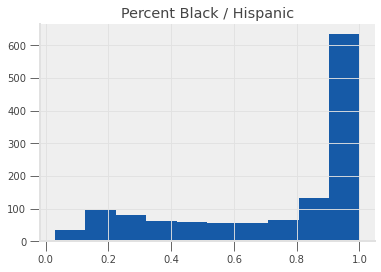

In [135]:
mydata.hist(column = "Percent Black / Hispanic")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94076d9760>]],
      dtype=object)

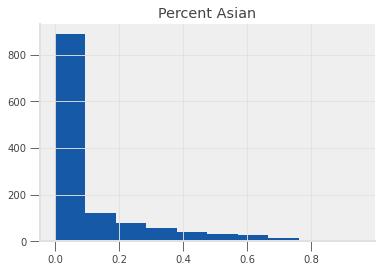

In [136]:
mydata.hist(column = "Percent Asian")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94079a8ac0>]],
      dtype=object)

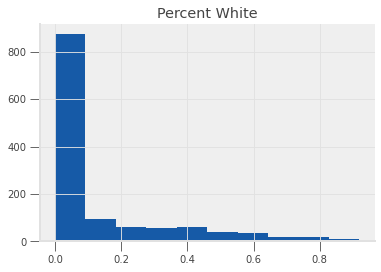

In [137]:
mydata.hist(column = "Percent White")

In [138]:
mydata[mydata['Percent Black / Hispanic'] >= .75][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     2.348459
Average Math Proficiency    2.434961
dtype: float64

In [139]:
mydata[mydata['Percent White'] >= .75][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     3.006429
Average Math Proficiency    3.196071
dtype: float64

In [140]:
mydata[mydata['Percent Asian'] >= .75][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     2.803846
Average Math Proficiency    3.366923
dtype: float64

Text(0, 0.5, 'Frequency Count')

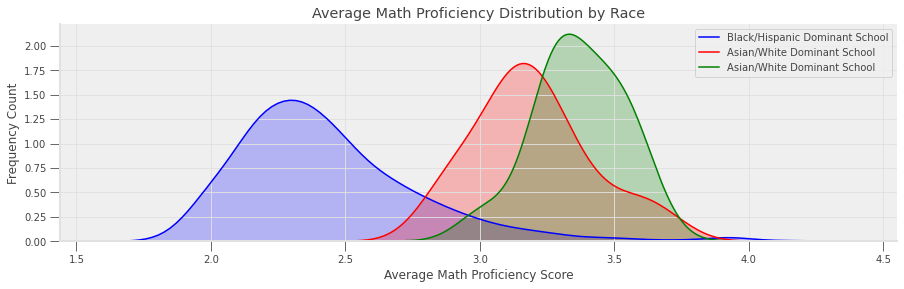

In [141]:
mydata['Black_Hispanic_Dominant'] = mydata['Percent Black / Hispanic'] >= .75
mydata['White_Dominant'] = mydata['Percent White'] >= .75
mydata['Asian_Dominant'] = mydata['Percent Asian'] >= .75
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(mydata.loc[(mydata['Black_Hispanic_Dominant'] == True),'Average Math Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(mydata.loc[(mydata['White_Dominant'] == True),'Average Math Proficiency'] , color='r',shade=True, label='Asian/White Dominant School')
ax=sns.kdeplot(mydata.loc[(mydata['Asian_Dominant'] == True),'Average Math Proficiency'] , color='g',shade=True, label='Asian/White Dominant School')
plt.title('Average Math Proficiency Distribution by Race')
plt.xlabel('Average Math Proficiency Score')
plt.ylabel('Frequency Count')

By the results, we can see white and asian race dominant school preform better on both ELA and Math. So I suppose that PASSNYC should focus more on the Black and Hispanic dominant school.

In [142]:
mydata.corr()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Percent Asian,Percent Black,Percent Hispanic,...,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Black_Hispanic_Dominant,White_Dominant,Asian_Dominant
SED Code,1.000000,0.951737,-0.636718,0.091508,0.742645,-0.243531,0.174739,0.285167,-0.004922,-0.323094,...,-0.033175,-0.009692,0.082033,0.055271,0.007877,0.051915,0.065238,-0.296013,0.188063,-0.006093
District,0.951737,1.000000,-0.617403,0.158269,0.747416,-0.213109,0.154909,0.288328,-0.004982,-0.297392,...,-0.021756,0.017017,0.090220,0.061956,0.014765,0.056525,0.083534,-0.279547,0.152606,-0.008882
Latitude,-0.636718,-0.617403,1.000000,0.324248,-0.573008,0.263546,-0.199676,-0.183018,-0.136522,0.548561,...,-0.006787,0.088892,-0.086713,-0.126133,-0.050507,-0.056971,-0.072861,0.311281,-0.254969,-0.036502
Longitude,0.091508,0.158269,0.324248,1.000000,0.406941,0.033417,-0.060946,0.152362,0.183256,0.000731,...,0.006199,0.011413,-0.010263,-0.100183,-0.025786,-0.001829,-0.022149,0.135933,-0.289509,-0.022316
Zip,0.742645,0.747416,-0.573008,0.406941,1.000000,-0.116817,0.062446,0.276521,0.183475,-0.353314,...,-0.002298,-0.017502,0.097025,0.032580,0.021633,0.070529,0.084121,-0.160820,-0.043322,0.003913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grade 8 Math 4s - Limited English Proficient,0.051915,0.056525,-0.056971,-0.001829,0.070529,-0.012204,-0.129457,0.232159,-0.103816,-0.044085,...,0.031255,0.197723,0.579224,0.179937,-0.003390,1.000000,0.525537,-0.137987,-0.018129,0.050013
Grade 8 Math 4s - Economically Disadvantaged,0.065238,0.083534,-0.072861,-0.022149,0.084121,-0.065712,-0.208881,0.226289,-0.104096,-0.073881,...,0.275702,0.527814,0.908916,0.643758,0.137070,0.525537,1.000000,-0.156033,-0.019331,-0.004685
Black_Hispanic_Dominant,-0.296013,-0.279547,0.311281,0.135933,-0.160820,0.637601,-0.389548,-0.662289,0.579521,0.379391,...,0.062802,-0.032384,-0.193184,-0.185104,-0.037204,-0.137987,-0.156033,1.000000,-0.198989,-0.139921
White_Dominant,0.188063,0.152606,-0.254969,-0.289509,-0.043322,-0.284868,0.214903,-0.058641,-0.157514,-0.170580,...,-0.023086,-0.024482,-0.018600,0.058286,-0.004208,-0.018129,-0.019331,-0.198989,1.000000,-0.015827


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9407bcf250>]],
      dtype=object)

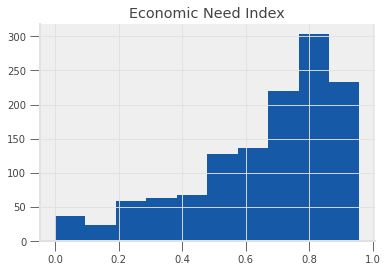

In [143]:
mydata.hist(column = "Economic Need Index")

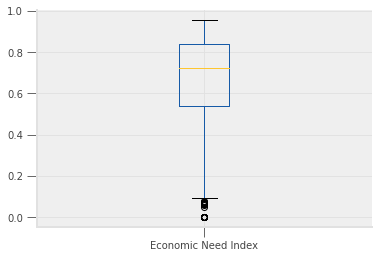

In [144]:
mydata.boxplot(column = "Economic Need Index")

In [145]:
mydata["Economic Need Index"].mean()

0.6590676100628937

In [146]:
mydata[mydata["Economic Need Index"] >= .66][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     2.344820
Average Math Proficiency    2.450466
dtype: float64

In [147]:
mydata[mydata["Economic Need Index"] < .66][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     2.839442
Average Math Proficiency    3.021073
dtype: float64

schools having higher economic need index have less average proficiency on both ELA and Math.
So, the schools that have higher economic need index need PASSNYC's service.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9425c850d0>]],
      dtype=object)

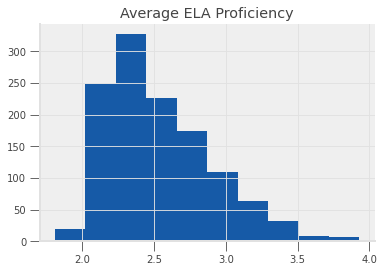

In [148]:
mydata.hist(column = "Average ELA Proficiency")

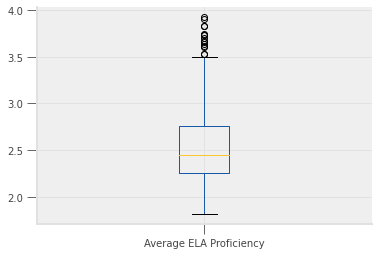

In [149]:
mydata.boxplot(column = "Average ELA Proficiency")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9407fae4c0>]],
      dtype=object)

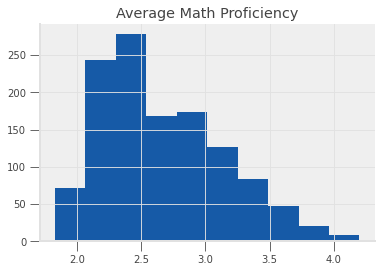

In [150]:
mydata.hist(column = "Average Math Proficiency")

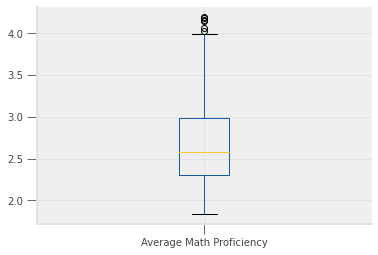

In [151]:
mydata.boxplot(column = "Average Math Proficiency")

In conclusion, Black and Hispanic dominant schools, especially having higher economic need index, need more PASSNYC's service.